 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports 
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
csvpath_whale = Path("C:/Users/simon/OneDrive/Desktop/Fintech/HomeWork/Week 3/Whale-of-a-portfolio-Homework/Homework_Week 4_Instructions_Starter_Code_Resources_whale_returns.csv")
csv_data_whale = pd.read_csv(csvpath_whale, parse_dates=["Date"], index_col="Date")

In [3]:
# Count nulls
csv_data_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
csv_data_whale_final = csv_data_whale.dropna().copy()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns

csvpath_algo = Path("C:/Users/simon/OneDrive/Desktop/Fintech/HomeWork/Week 3/Whale-of-a-portfolio-Homework/Homework_Week 4_Instructions_Starter_Code_Resources_algo_returns.csv")
csv_data_algo = pd.read_csv(csvpath_algo, parse_dates=["Date"], index_col="Date")

In [6]:
# Count nulls

csv_data_algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls

csv_data_algo_final = csv_data_algo.dropna().copy()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices

csvpath_tsx = Path("C:/Users/simon/OneDrive/Desktop/Fintech/HomeWork/Week 3/Whale-of-a-portfolio-Homework/Homework_Week 4_Instructions_Starter_Code_Resources_sp_tsx_history.csv")
csv_data_tsx = pd.read_csv(csvpath_tsx, parse_dates=["Date"], index_col="Date")

In [9]:
# Check Data Types

csv_data_tsx.dtypes 

Close    object
dtype: object

In [10]:
# Fix Data Types

# This code fixes the data types to remove symbols such as "$"

csv_data_tsx["Close"] = csv_data_tsx["Close"].str.replace("$", "", regex=False)
csv_data_tsx["Close"] = csv_data_tsx["Close"].str.replace(",", "", regex=False)
csv_data_tsx["Close"] = pd.to_numeric(csv_data_tsx["Close"])

In [11]:
#Calculate daily returns

daily_returns_tsx = csv_data_tsx.pct_change()

In [12]:
# Drop nulls

daily_returns_tsx = daily_returns_tsx.dropna().copy()

In [13]:
# Rename `Close` Column to be specific to this portfolio.

columns = ["S & P TSX"]
daily_returns_tsx.columns = columns
csv_data_tsx_final = daily_returns_tsx

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

# "combo" in whale_algo_tsx_combo refers to the combination of the 3 data frames (whale, algo and tsx).

whale_algo_tsx_combo = pd.concat([csv_data_whale_final, csv_data_algo_final, csv_data_tsx_final], axis="columns", join="inner")
whale_algo_tsx_combo

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns for all portfolios'}, xlabel='Date', ylabel='Daily return'>

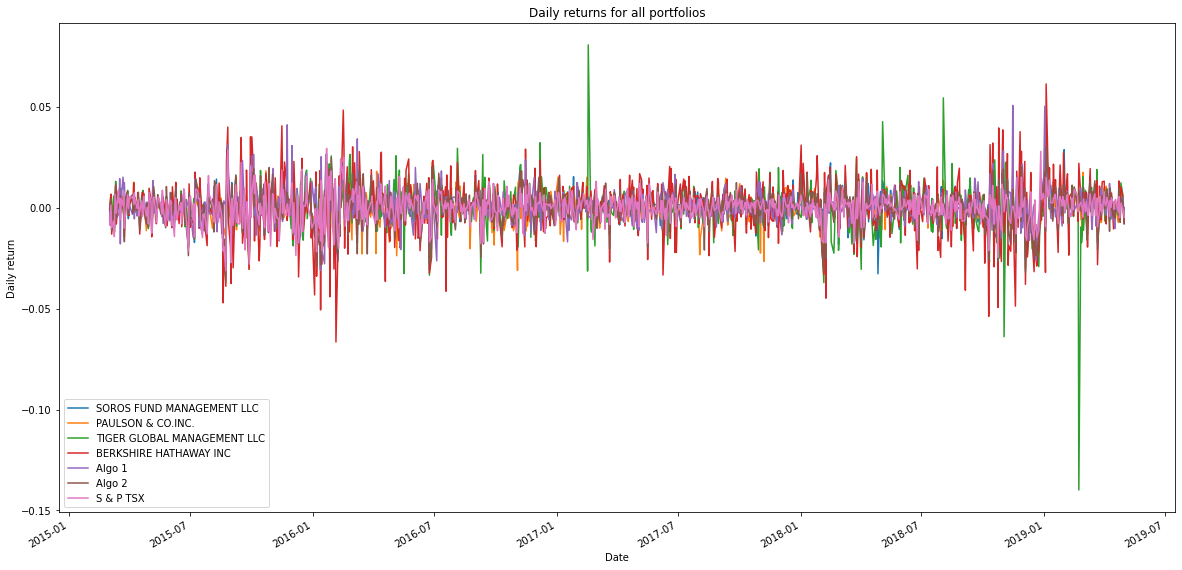

In [15]:
# Plot daily returns of all portfolios

whale_algo_tsx_combo.plot(figsize=(20, 10), title="Daily returns for all portfolios", ylabel="Daily return")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns for all portfolios'}, xlabel='Date', ylabel='Cumulative return'>

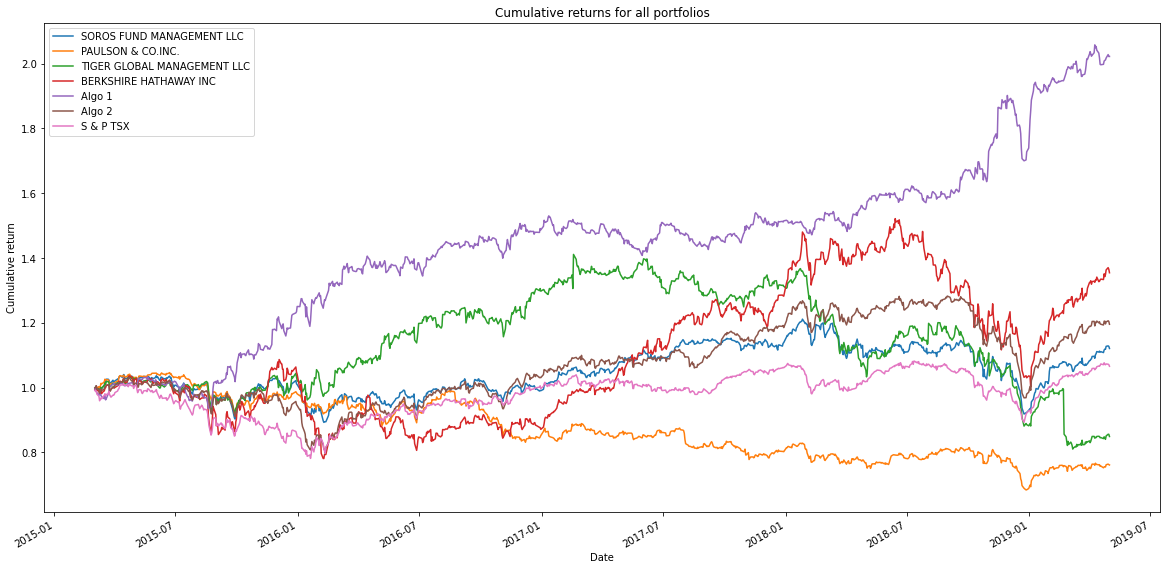

In [16]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + whale_algo_tsx_combo).cumprod()
cumulative_returns.head()

# Plot cumulative returns

cumulative_returns.plot(figsize=(20,10), title="Cumulative returns for all portfolios", ylabel="Cumulative return")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio visualisation - box plot'}, ylabel='Daily Return'>

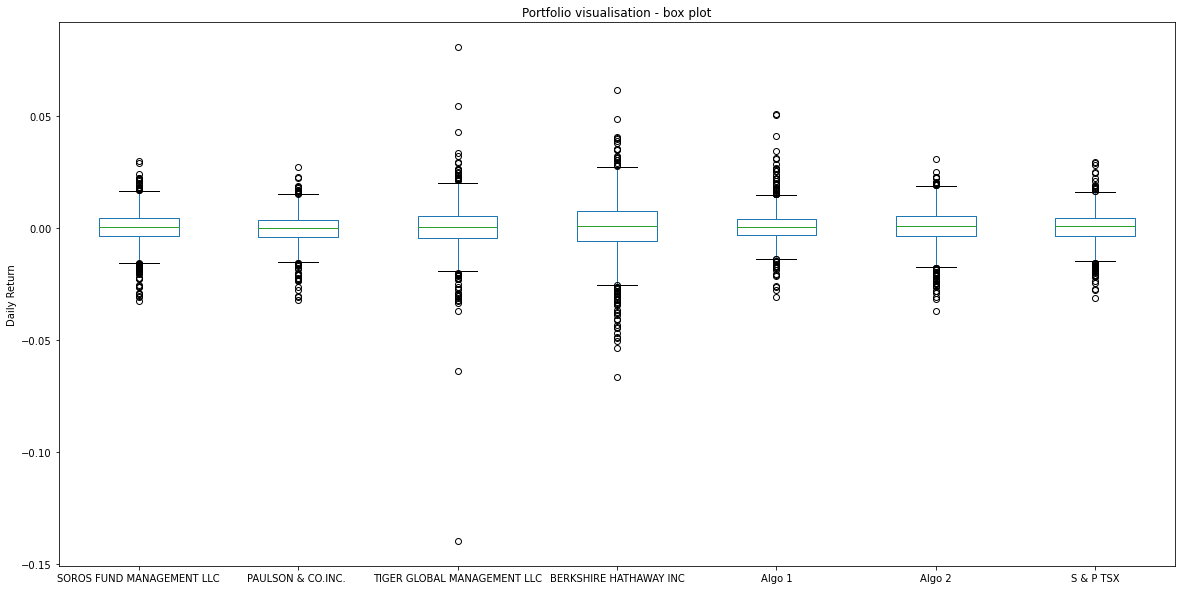

In [17]:
# Box plot to visually show risk

whale_algo_tsx_combo.plot.box(figsize=(20,10), title="Portfolio visualisation - box plot", ylabel="Daily Return")

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios

daily_std_dev = whale_algo_tsx_combo.std()
daily_std_dev

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S & P TSX                      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate the daily standard deviation of S&P TSX 60

std_dev_tsx = whale_algo_tsx_combo["S & P TSX"].std()
print(f"The standard deviation of S&P TSX 60 is {std_dev_tsx}")

The standard deviation of S&P TSX 60 is 0.007034167748577725


In [20]:
# Determine which portfolios are riskier than the S&P TSX 60

# Code to sort values in descending order (highest value first)

daily_std_risk = daily_std_dev.sort_values(ascending=False)
daily_std_risk

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S & P TSX                      0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

Standard deviation is a statistic that measures the dispersion of a dataset relative to its mean. (https://www.investopedia.com/terms/s/standarddeviation.asp)
If the data points are further from the mean, there is a higher deviation within the data set; thus, the more spread out the data, the higher the standard deviation. (https://www.investopedia.com/terms/s/standarddeviation.asp)

Therefore the code above sorts the standard deviations in descending order (highest value first), which allows for the riskier portfolios to be easiliy identified. The riskier portfolios will have a higher standard deviation.

The portfolios which are riskier than the S & P TSX 60 are:

BERKSHIRE HATHAWAY INC         
TIGER GLOBAL MANAGEMENT LLC    
Algo 2                        
SOROS FUND MANAGEMENT LLC      
Algo 1 

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)

annualised_std_dev = daily_std_dev * np.sqrt(252)
annualised_std_dev

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S & P TSX                      0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling standard deviation (21 day window) Chart'}, xlabel='Date', ylabel='Standard deviation'>

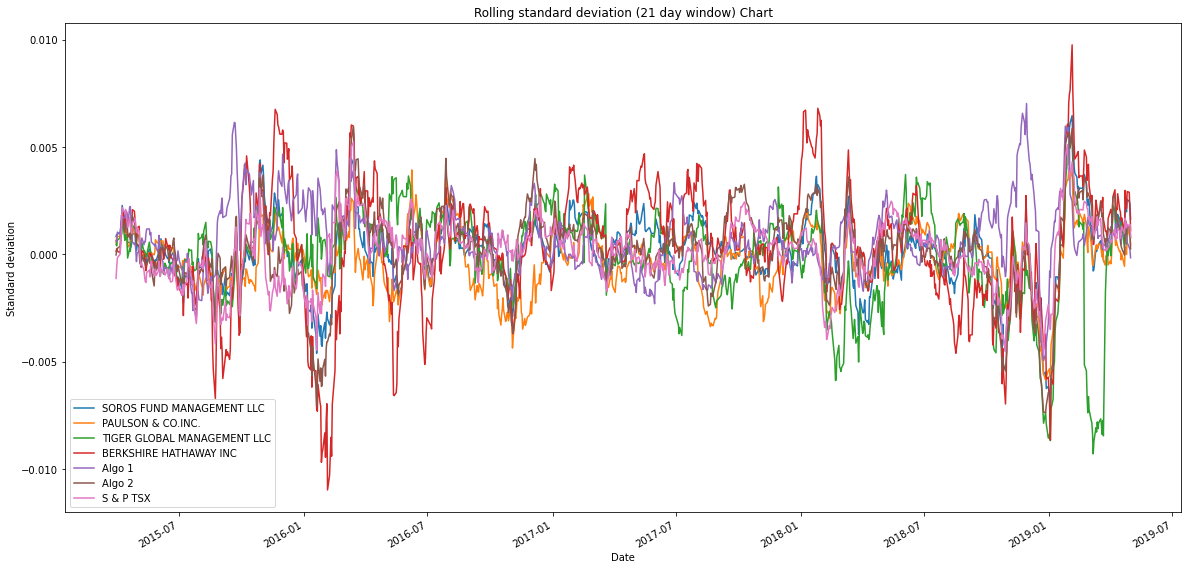

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

std_dev_roll_21d = whale_algo_tsx_combo.rolling(21).std()

# Plot the rolling standard deviation

whale_algo_tsx_combo.rolling(window=21).mean().plot(figsize=(20,10), title="Rolling standard deviation (21 day window) Chart", ylabel="Standard deviation")

### Calculate and plot the correlation

<AxesSubplot:>

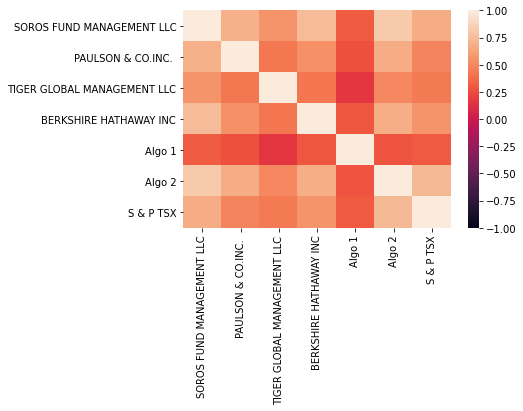

In [23]:
# Calculate the correlation

correlation = whale_algo_tsx_combo.corr()

# Display de correlation matrix

import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

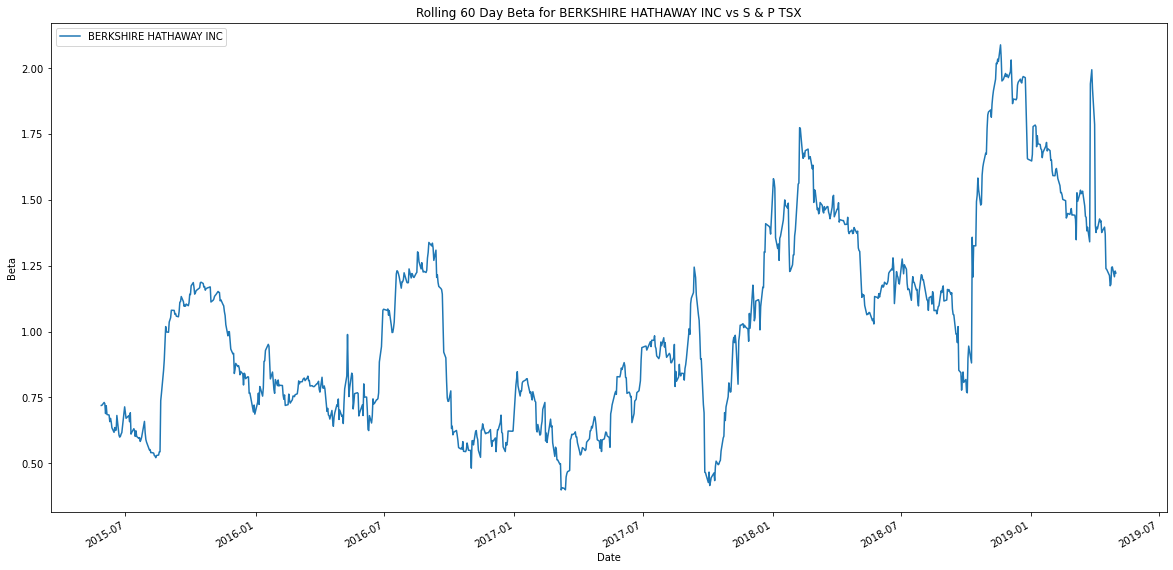

In [24]:
# Calculate covariance of a single portfolio 

# Single portfolio chosen is Berkshire Hathaway Inc.

covariance = whale_algo_tsx_combo['BERKSHIRE HATHAWAY INC'].cov(whale_algo_tsx_combo['S & P TSX'])

# Calculate variance of S&P TSX

variance = whale_algo_tsx_combo['S & P TSX'].var()

# Computing beta

berkshire_beta = covariance / variance

# Plot beta trend - then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

#Code for Co-variance 
rolling_berkshire_covariance = whale_algo_tsx_combo["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(whale_algo_tsx_combo["S & P TSX"])

#Code for variance
rolling_sptsx_variance = whale_algo_tsx_combo["S & P TSX"].rolling(window=60).var()

#Code for 60 day rolling beta (covariance divided by variance)

berkshire_beta_60day = rolling_berkshire_covariance / rolling_sptsx_variance

#Code to plot Beta

beta_plot_berkshire_sptsx = berkshire_beta_60day.plot(figsize=(20, 10), title="Rolling 60 Day Beta for BERKSHIRE HATHAWAY INC vs S & P TSX", ylabel="Beta")

# Set the legend of the figure

beta_plot_berkshire_sptsx.legend(["BERKSHIRE HATHAWAY INC"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'EWM 21-day half life'}, xlabel='Date', ylabel='EWM'>

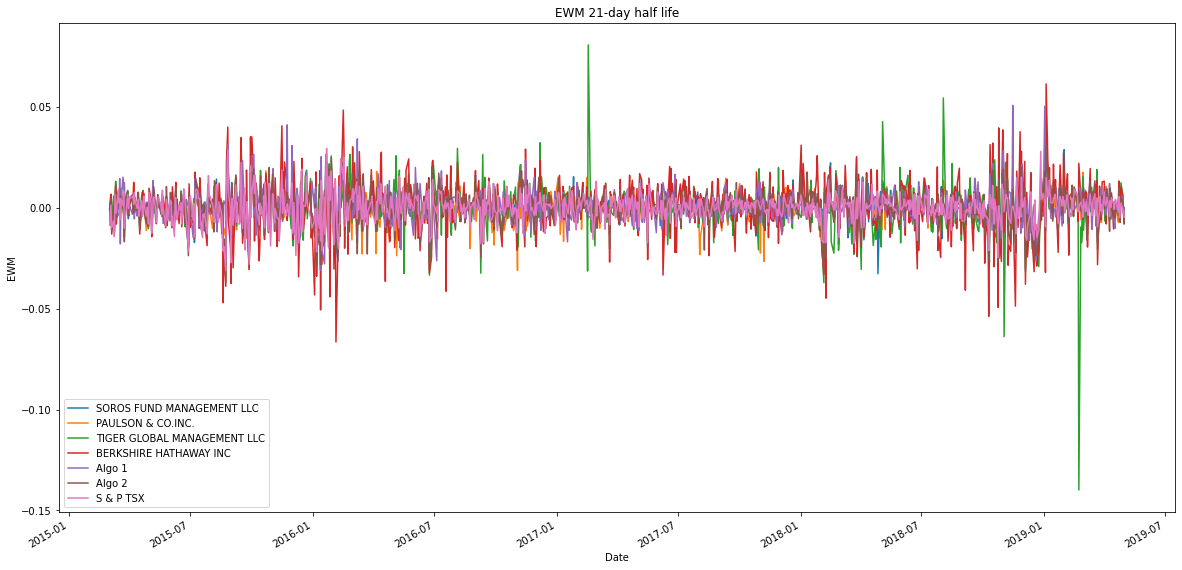

In [25]:
# Use `ewm` to calculate the rolling window

whale_algo_tsx_combo.ewm(halflife=21).mean()

#code to plot ewm

whale_algo_tsx_combo.plot(figsize=(20, 10), title="EWM 21-day half life", ylabel="EWM")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios

# sharpe_ratios = ((whale_algo_tsx_combo.mean()-whale_algo_tsx_combo["rf_rate"].mean()) * 252) / (daily_std_dev() * np.sqrt(252)).
# The above code can used to determine the sharpe ratio, note that "rf_rate" refers to risk free rate.
# In some calculations of sharpe ratio the rf_rate is assumed to be 0.
# For the purposes of this analysis we will assume rf_rate to be 0 as a figure was not provided as part of the starter code.
# "was" in sharpe_ratios_wat refers to "Whale, Algorithmic and S&P TSX.

sharpe_ratios_wat = (whale_algo_tsx_combo.mean() * 252) / (daily_std_dev * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios for WAS'}, ylabel='Sharpe ratio'>

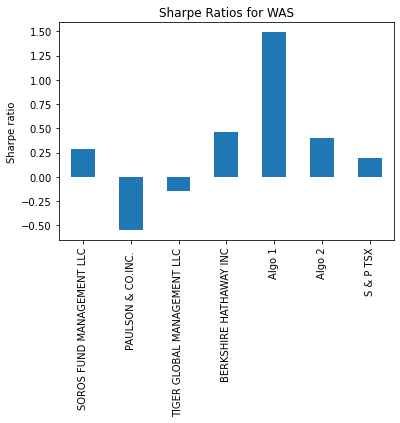

In [27]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios_wat.plot(kind="bar", title="Sharpe Ratios for WAS", ylabel="Sharpe ratio")

The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk (Stanford University. "The Sharpe Ratio", http://web.stanford.edu/~wfsharpe/art/sr/sr.htm).

Generally, the greater the value of the Sharpe ratio, the more attractive the risk-adjusted return (https://www.investopedia.com/terms/s/sharperatio.asp)

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Based on the above analysis the following conclusions can be drawm relating to the algorithmic strategies performance when compared to both S&P TSX 60 and the whale portfolios:

Algo 1 outperfomred all the whale portfolios, the S&P TSX 60 and Algo 2 portfolio by a considerable margin. 

Algo 2 outperformed the S&P TSX 60, Soros Fund Management LLC, Paulson & Co Inc, Tiger Global Management LLC. However, Algo 2 was NOT able to outperform Berkshire Hathaway Inc and Algo 2.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

Note: data for the stocks SHOP, OTEX and L was retreived using the Google Finance function 

In [28]:
# Reading data from 1st stock

csvpath_shopify = Path("C:/Users/simon/OneDrive/Desktop/Fintech/HomeWork/Week 3/Whale-of-a-portfolio-Homework/shopify_closing_data.csv")
csv_data_shopify = pd.read_csv(csvpath_shopify, parse_dates=["Date"], index_col="Date")

In [29]:
# Reading data from 2nd stock

csvpath_otex = Path("C:/Users/simon/OneDrive/Desktop/Fintech/HomeWork/Week 3/Whale-of-a-portfolio-Homework/otex_closing_data.csv")
csv_data_otex = pd.read_csv(csvpath_otex, parse_dates=["Date"], index_col="Date")

In [30]:
# Reading data from 3rd stock

csvpath_loblaw = Path("C:/Users/simon/OneDrive/Desktop/Fintech/HomeWork/Week 3/Whale-of-a-portfolio-Homework/loblaw_closing_data.csv")
csv_data_loblaw = pd.read_csv(csvpath_loblaw, parse_dates=["Date"], index_col="Date")


In [31]:
# Combine all stocks in a single DataFrame

shopify_otex_loblaw = pd.concat([csv_data_shopify, csv_data_otex, csv_data_loblaw], axis="columns", join="inner")

# Reset Date index
# Note when reading in the csv files above the Date index has been reset, below code is to remove the digital time stamp while leaving date in YYY -MM-DD format.
shopify_otex_loblaw.index.date 
shopify_otex_loblaw.index = shopify_otex_loblaw.index.date 

In [32]:
# Reorganize portfolio data by having a column per symbol

#Code to change the column headings from 'Close' to the relevant stock.
shopify_otex_loblaw.columns = ['Shopify', 'Otex', 'Loblaw']

#Code to display the data frame and confirm coding above has worked.
shopify_otex_loblaw

,Shopify,Otex,Loblaw
2015-05-21,25.68,21.23,53.90
2015-05-22,28.31,21.52,53.86
2015-05-26,29.65,21.38,54.20
2015-05-27,27.50,21.22,54.55
2015-05-28,27.45,21.27,54.22
...,...,...,...
2019-04-24,219.81,38.14,64.88
2019-04-25,218.97,38.35,65.36
2019-04-26,222.28,38.42,65.12
2019-04-29,225.79,38.27,65.31


In [33]:
# Calculate daily returns 

# note that 'sol' in daily_returns_sol refers to shopify_otex_loblaw

daily_returns_sol = shopify_otex_loblaw.iloc[:][["Shopify","Otex", "Loblaw"]]
daily_returns_sol = daily_returns_sol.pct_change()

# Drop NAs

daily_returns_sol = daily_returns_sol.dropna().copy()

# Display sample data

daily_returns_sol

,Shopify,Otex,Loblaw
2015-05-22,0.102414,0.013660,-0.000742
2015-05-26,0.047333,-0.006506,0.006313
2015-05-27,-0.072513,-0.007484,0.006458
2015-05-28,-0.001818,0.002356,-0.006049
2015-05-29,-0.009107,-0.002351,-0.013833
...,...,...,...
2019-04-24,-0.016246,0.000525,-0.017863
2019-04-25,-0.003821,0.005506,0.007398
2019-04-26,0.015116,0.001825,-0.003672
2019-04-29,0.015791,-0.003904,0.002918


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights

weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

weighted_portfolio_returns = daily_returns_sol.dot(weights)

# Display sample data

weighted_portfolio_returns

2015-05-22    0.038444
2015-05-26    0.015713
2015-05-27   -0.024513
2015-05-28   -0.001837
2015-05-29   -0.008430
                ...   
2019-04-24   -0.011195
2019-04-25    0.003028
2019-04-26    0.004423
2019-04-29    0.004935
2019-04-30    0.029391
Length: 962, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame

returns_vs_weighted_returns = pd.concat([daily_returns_sol, weighted_portfolio_returns], axis="columns", join="inner")
returns_vs_weighted_returns.columns = ['Shopify', 'Otex', 'Loblaw', 'Weighted Returns']
returns_vs_weighted_returns

,Shopify,Otex,Loblaw,Weighted Returns
2015-05-22,0.102414,0.013660,-0.000742,0.038444
2015-05-26,0.047333,-0.006506,0.006313,0.015713
2015-05-27,-0.072513,-0.007484,0.006458,-0.024513
2015-05-28,-0.001818,0.002356,-0.006049,-0.001837
2015-05-29,-0.009107,-0.002351,-0.013833,-0.008430
...,...,...,...,...
2019-04-24,-0.016246,0.000525,-0.017863,-0.011195
2019-04-25,-0.003821,0.005506,0.007398,0.003028
2019-04-26,0.015116,0.001825,-0.003672,0.004423
2019-04-29,0.015791,-0.003904,0.002918,0.004935


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

# Code to check if there are any null values

returns_vs_weighted_returns.isnull().sum()

Shopify             0
Otex                0
Loblaw              0
Weighted Returns    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`

returns_vs_weighted_returns_std = returns_vs_weighted_returns.std()
returns_vs_weighted_returns_std_annual = returns_vs_weighted_returns_std * np.sqrt(252)
returns_vs_weighted_returns_std_annual

Shopify             0.510759
Otex                0.247617
Loblaw              0.154031
Weighted Returns    0.227758
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling standard deviation (21-day window)'}, xlabel='Date', ylabel='Standard Deviation'>

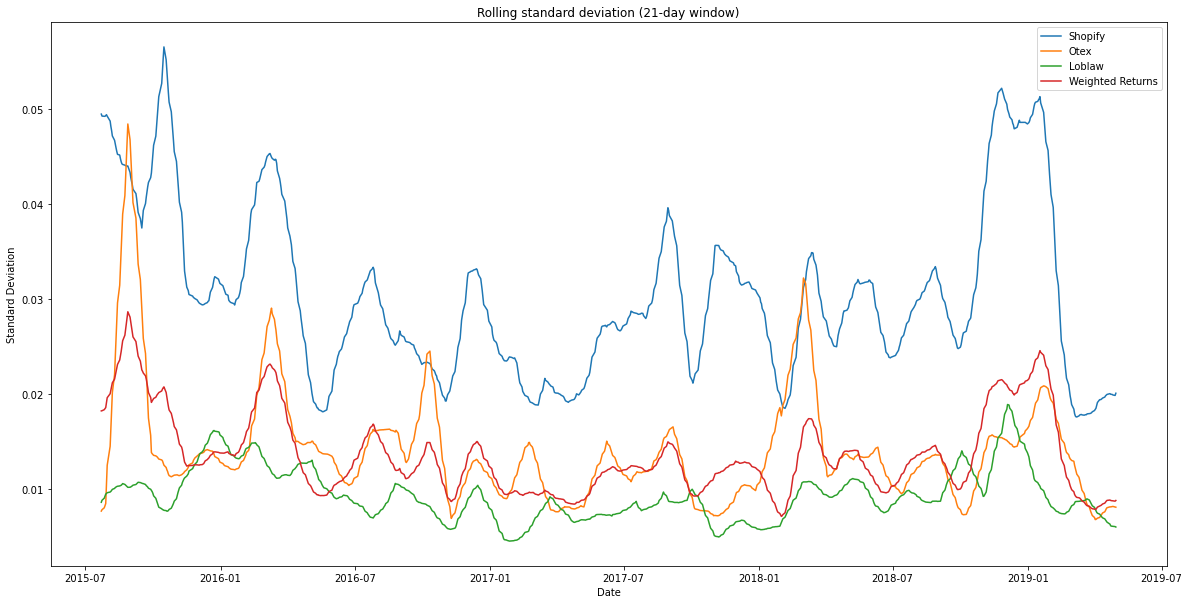

In [38]:
# Calculate rolling standard deviation

#Note "stddev21" refers to standard deviation 21-day window.

stddev21_returns_vs_weighted_returns = returns_vs_weighted_returns.rolling(21).std()

# Plot rolling standard deviation

stddev21_returns_vs_weighted_returns.rolling(window=21).mean().plot(figsize=(20, 10), title="Rolling standard deviation (21-day window)", ylabel="Standard Deviation", xlabel="Date")

### Calculate and plot the correlation

<AxesSubplot:>

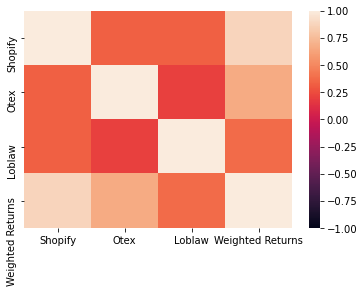

In [39]:
# Calculate and plot the correlation

import seaborn as sns
correlation = stddev21_returns_vs_weighted_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [40]:
# Calculate and plot Beta

# Note "sp" in rolling_sp_variance refers to S&P TSX.

rolling_sp_variance = whale_algo_tsx_combo["S & P TSX"].rolling(window=60).var()


In [41]:
#Covariance of the portfolio vs S & P TSX

rolling_covariance = returns_vs_weighted_returns["Weighted Returns"].cov(whale_algo_tsx_combo["S & P TSX"])


In [42]:
# rolling beta = rolling covariance / rolling variance

rolling_beta_portfolio = rolling_covariance / rolling_sp_variance


<AxesSubplot:title={'center':'Rolling 60-Day Beta of portfolio'}, xlabel='Date', ylabel='Rolling 60-Day Beta'>

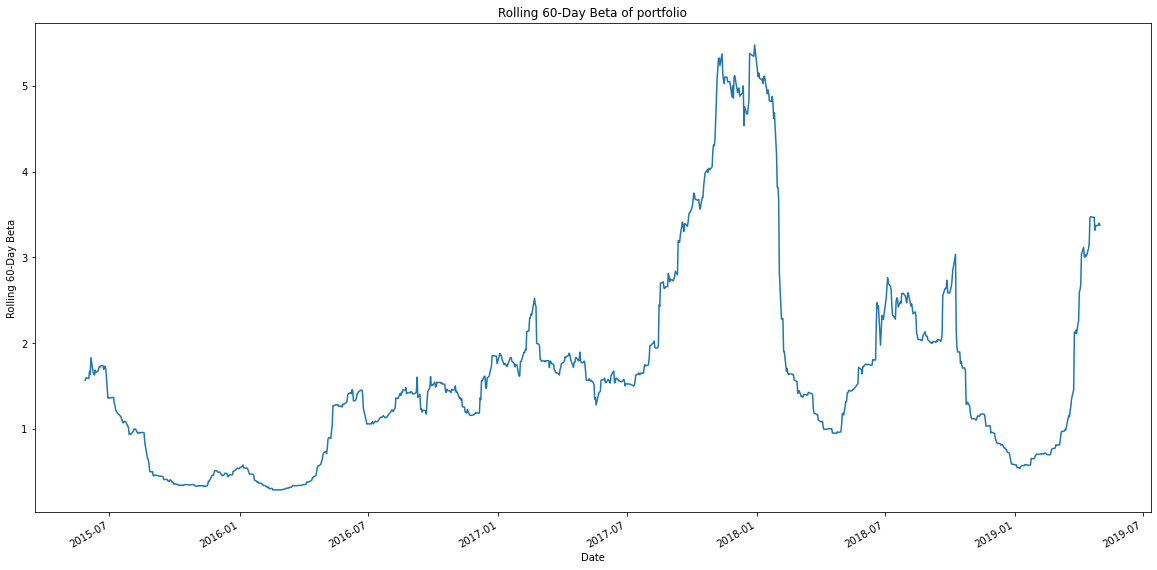

In [43]:
#plot of rolling beta

rolling_beta_portfolio.plot(figsize=(20, 10), title='Rolling 60-Day Beta of portfolio', ylabel="Rolling 60-Day Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualzied Sharpe Ratios

# Note "watc" in my_portfolio_vs watc refers to whale_algo_tsx_combo
# Code to create and display the new dataframe containing all the relevant portfolios

my_portfolio_vs_watc = pd.concat(([whale_algo_tsx_combo, returns_vs_weighted_returns["Weighted Returns"]]), axis="columns", join="inner")

# Code to change the last column name from "Weighted Returns" to "MY PORTFOLIO" to give the column accurate name inline with other portfolios listed

my_portfolio_vs_watc = my_portfolio_vs_watc.rename(columns={"Weighted Returns": "MY PORTFOLIO"})

# Code to display the dataframe 

my_portfolio_vs_watc

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P TSX,MY PORTFOLIO
2015-05-22,0.000542,0.000292,0.000734,0.005268,-0.007780,-0.003892,-0.000187,0.038444
2015-05-26,-0.008718,0.000968,-0.007167,-0.003362,-0.004471,-0.009913,-0.008994,0.015713
2015-05-27,0.005536,0.003383,0.005831,0.003505,0.000935,0.010525,0.003964,-0.024513
2015-05-28,-0.001599,0.000619,-0.001491,-0.008909,0.003087,0.001252,-0.000230,-0.001837
2015-05-29,-0.001533,0.000059,-0.004973,-0.005498,-0.001715,-0.005320,-0.006150,-0.008430
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,-0.011195
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003028
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.004423
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.004935


In [45]:
# Code to calculate and display the sharpe ratios

sharpe_ratios_my_portfolio_vs_watc = (my_portfolio_vs_watc.mean() * 252) / (my_portfolio_vs_watc.std() * np.sqrt(252))
sharpe_ratios_my_portfolio_vs_watc

SOROS FUND MANAGEMENT LLC      0.276087
PAULSON & CO.INC.             -0.584563
TIGER GLOBAL MANAGEMENT LLC   -0.132304
BERKSHIRE HATHAWAY INC         0.456669
Algo 1                         1.518048
Algo 2                         0.437746
S & P TSX                      0.287617
MY PORTFOLIO                   1.417161
dtype: float64

<AxesSubplot:title={'center':'My Portfolio vs WATC Sharpe Ratios'}, ylabel='Sharpe ratio'>

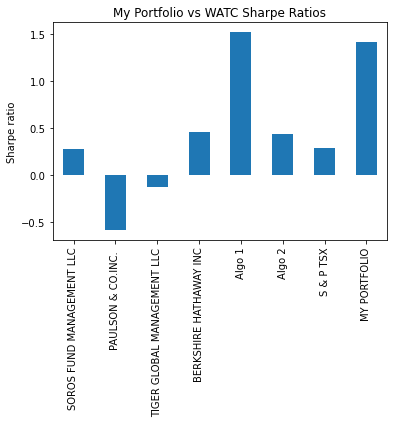

In [46]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios_my_portfolio_vs_watc.plot(kind="bar", title="My Portfolio vs WATC Sharpe Ratios", ylabel="Sharpe ratio")

### How does your portfolio do?

Write your answer here!

Based on the above analysis my portfolio performed strongly and was able to provide better returns when compared to the S&P TSX and all the whale portfolios (Soros Fund, Paulson & Co, Tiger Global Management and Berkshire Hathaway). My portfolio was slightly outperformed by the algorithmic 1 portfolio. This suggests an outstanding return on investment when compared to larger and more advanced portfolios such as Berkshire Hathaway and a great return when compared to the S&P TSX.